# Student Performance Analysis Project

## Objective:
To analyze student data and identify key factors affecting academic performance. This analysis helps provide insights for educators and students to improve outcomes.

**Dataset:** Student Performance Dataset (Math Subject)  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn


##  Load and View the Dataset
We load the student-mat.csv dataset using Pandas and view the first few rows.


In [19]:
import pandas as pd

df = pd.read_csv("C:\\Users\\PRAKASH ROUT\\Downloads\\student\\student-mat.csv", sep=';')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##  Explore the Dataset
Let's check the dataset's shape, columns, data types, and null values.


In [20]:
#Check Basic Info
df.info()
df.shape
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


##  Understand the Features
Explore categorical and numerical columns to understand their distributions.


In [21]:
#Check data types and unique values:

df['sex'].value_counts()
df['studytime'].value_counts()
df['failures'].value_counts()


failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

In [22]:
# Understand target variable

df['average_score'] = df[['G1', 'G2', 'G3']].mean(axis=1)


##  Data Cleaning

In [24]:
# Handle categorical data if needed
# Convert binary columns (yes/no) to 1/0
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})


In [25]:
# Check and remove duplicates
df.drop_duplicates(inplace=True)


## Exploratory Data Analysis (EDA)

In this step, we explore the dataset visually to uncover patterns, trends, and relationships between different features and student performance.

We use **Matplotlib** and **Seaborn** libraries to create informative visualizations.


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### 1. Distribution of Average Scores

We analyze how the average scores of students are distributed across the dataset.


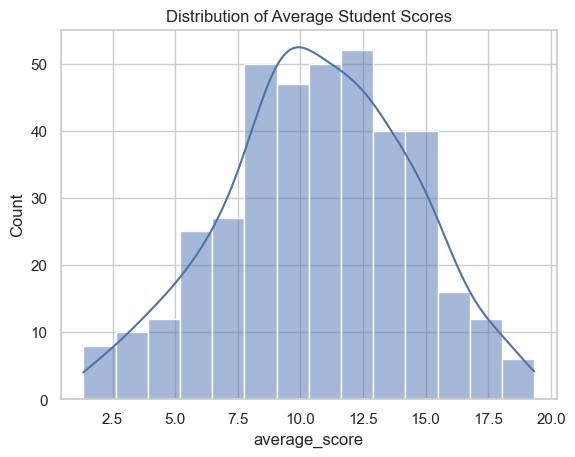

In [28]:
sns.histplot(df['average_score'], kde=True)
plt.title('Distribution of Average Student Scores')
plt.show()


### 2. Study Time vs Average Score

We visualize how the amount of time students dedicate to studying impacts their average scores.


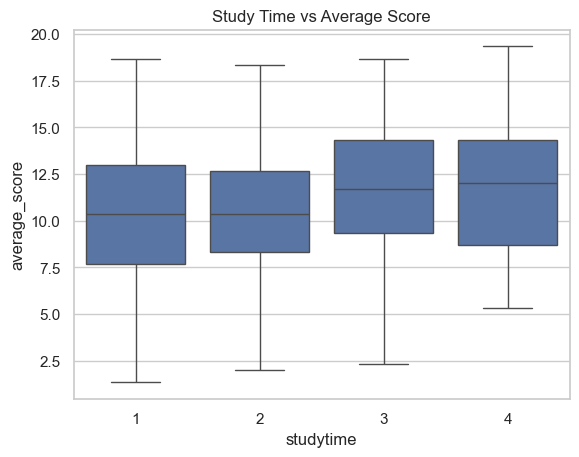

In [29]:
sns.boxplot(x='studytime', y='average_score', data=df)
plt.title('Study Time vs Average Score')
plt.show()


### 3. Gender vs Performance

We compare average scores between male and female students to see if there's a performance gap

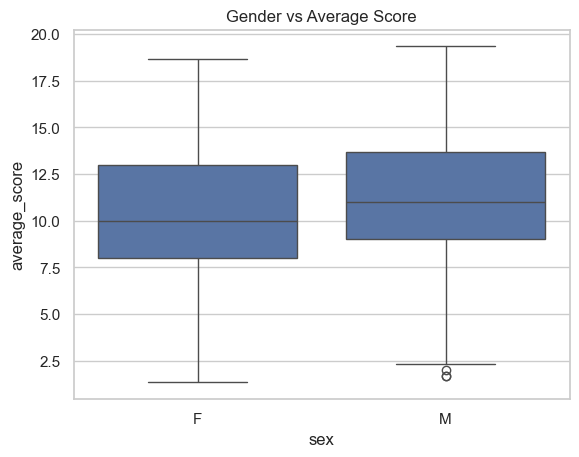

In [12]:
# gender comparison 
sns.boxplot(x='sex', y='average_score', data=df)
plt.title('Gender vs Average Score')
plt.show()


### 4. Failures vs Average Score

We explore how the number of past class failures affects student performance.


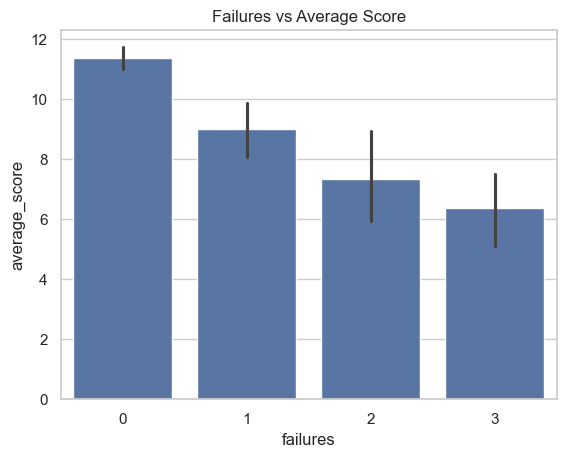

In [13]:
# Failure VS Performance 
sns.barplot(x='failures', y='average_score', data=df)
plt.title('Failures vs Average Score')
plt.show()


##  Correlation Analysis

In this step, we analyze how numeric features are correlated with each other, especially with the final grade (`G3`) and the `average_score`.

A correlation matrix helps us identify:
- Strong positive or negative relationships
- Multicollinearity
- Key influencing factors for student performance


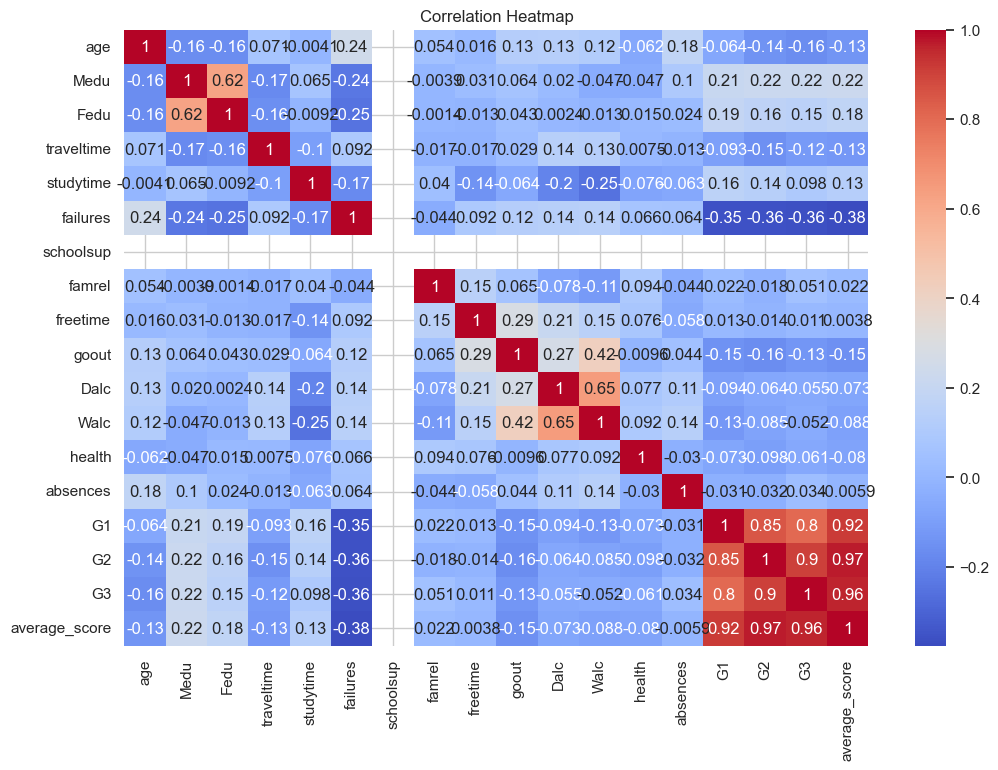

In [30]:
# co-relations heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##  Key Insights & Recommendations

### 🔍 Key Insights:

1. **Previous Grades (G1, G2):**
   - Strongly correlated with the final grade (G3).
   - Students with higher scores in G1 and G2 tend to perform well in G3.

2. **Study Time:**
   - More study time is generally associated with better performance.
   - Students who study more than 2 hours show higher average scores.

3. **Failures:**
   - Number of past class failures negatively affects the final grade.
   - Students with 0 past failures perform significantly better.

4. **Parental Education:**
   - A slight positive impact on student performance, especially from mother's education level.


5. **Gender:**
   - No major difference in performance between male and female students.

---

### ✅ Recommendations:

- **Early Intervention:** Track student grades from G1 and G2 to identify those who may need extra help before final exams.
- **Encourage Study Time:** Promote study habits of more than 2 hours per week to improve overall performance.
- **Support Struggling Students:** Provide extra tutoring for students with a history of failures.
- **Continue School Support Programs:** These help improve performance and should be maintained or expanded.
- **Parental Engagement:** Educating parents about their influence can positively impact student outcomes.

---

### 🏁 Conclusion:

This analysis provides a clear picture of the key factors that influence student academic performance. With the right support systems and timely interventions, educators and parents can work together to help students succeed.
